# [EN.601.664] Artificial Intelligence

- JHU Spring 2023
- Instuctor: Musad Haque, Ph.D.
[`email`](mailto:mhaque5@jhu.edu)
[`personal webpage`](https://civspace.jhuapl.edu/people/musad-haque)

# Final Project

## Project Category #2: Decision Trees

| Group Member              | JHU email                                           | 
|:--------------------------|:----------------------------------------------------|
| Danny (Iou-Sheng) Chang   | [`email`](mailto:ichang9@jhu.edu) ichang9@jhu.edu   |
| Austin (Ching-Yang) Huang | [`email`](mailto:chuan120@jhu.edu) chuan120@jhu.edu |
| Yutai Wang                | [`email`](mailto:ywang790@jhu.edu) ywang790@jhu.edu |
| Zijun Ding                | [`email`](mailto:zding26@jhu.edu) zding26@jhu.edu   |
| Xinzhuo Yan               | [`email`](mailto:xyan28@jhu.edu) xyan28@jhu.edu     |
| Bingchen Lu               | [`email`](mailto:blu16@jhu.edu) blu16@jhu.edu       |


## Deliverables

### Recording of Lecture

[Link to Recording of Lecture](https://drive.google.com/file/d/1S9747kXPY2jqO75LyD-fAZUJVwgQKWw0/view?usp=share_link)

### Presentation Slides

[Link to Presentation Slides](https://docs.google.com/presentation/d/1SDlKnocx_R2BNSgG3d9Up-Z3Tzn3iSdk/edit?usp=share_link&ouid=112215371821412836121&rtpof=true&sd=true)

## Import Required Packages

### Add Basic Imports

[`NumPy`](https://numpy.org/)

In [1]:
import numpy as np

[`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) [`deque`](https://docs.python.org/3/library/collections.html#collections.deque)

In [2]:
from collections import Counter
from collections import deque

[`os`](https://docs.python.org/3/library/os.html)

In [3]:
import os

### Add Imports for matplotlib

[`matplotlib`](https://matplotlib.org/) [`pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

In [4]:
import matplotlib.pyplot as plt

### Add Imports for scikit-learn Datasets

[`scikit-learn`](https://scikit-learn.org/stable/index.html) [`Iris Dataset`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) [`Digits Dataset`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [5]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

### Add Imports for scikit-learn Decision Tree Classifier

[`tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html): for obtaining ground truth of test cases classification prediction

In [6]:
from sklearn import tree

## The Decision Tree Classifier

The Decision Tree Classifier, which recursively splits data based on the specified splitting criterion to create a tree structure for predicting class labels. Contains methods to fit the model, predict class labels, and print ASCII visualization of trees.

### Functions

- `__init__`
```python
def __init__(self, max_depth=None)
```
- `fit`: the _fit_ function builds the decision tree classifier using the specified splitting criterion.
```python
def fit(self, datas, labels, criterion="gini-impurity")
```
- `predict`: the _perdict_ function predicts classes of the input datas.
```python
def predict(self, datas)
```
- `print_decision_tree`: the _print_decision_tree_ function prints an ASCII visualization of the decision tree to a `.txt file` if _file_name_ is specified, else to the `terminal`.
```python
def print_decision_tree(self, feature_names, class_names, criterion="gini-impurity", file_name=None, show_details=True)
```
- `_grow_tree`: the internal use _grow_tree_ function builds the decision tree by recursively finding the best split using the specified splitting criterion.
```python
def _grow_tree(self, datas, labels, criterion, depth=0)
```
- `_predict`: the internal use _predict_ function predicts the class for a single input data.
```python
def _predict(self, inputs)
```

### Arguments

- **criterion** str: the function to measure the quality of a split.
```python
criterion=["gini-impurity", "chi-square", "information-gain", "reduction-in-variance"], default="gini-impurity"
```
- **max_depth** int: the maximum depth of the tree; if None, then nodes are expanded until all leaves are pure.
```python
max_depth int, default=None
```
- **file_name** str: the filename to save the ASCII visualization of the decision tree; if None, then display in terminal.
```python
file_name str, default=None
```
- **show_details** bool: **False** to print only the split decision; **True** to print also the criterion purity score, total number of samples, and number of samples per class.
```python
max_depth bool, default=True
```

### class DecisionTreeClassifier

In [7]:
class DecisionTreeClassifier:
    """
    Class of the Decision Tree Classifier.
    """
    def __init__(self, max_depth=None):
        self.max_depth = max_depth if max_depth else np.inf

    def fit(self, datas, labels, criterion="gini-impurity"):
        """
        Build the decision tree classifier using the specified splitting criterion.
        """
        self.n_classes_ = len(set(labels))
        self.n_features_ = datas.shape[1]
        self.treeNode_ = self._grow_tree(datas, labels, criterion)

    def predict(self, datas):
        """
        Predict classes of the input datas.
        """
        return [self._predict(inputs) for inputs in datas]

    def print_decision_tree(self, feature_names, class_names, criterion="gini-impurity", file_name=None, show_details=True):
        """
        Print an ASCII visualization of the decision tree to a `.txt file` if _file_name_ is specified, else to the `terminal`.
        """
        self.treeNode_._print_decision_tree(feature_names, class_names, criterion, file_name, show_details)

    def _grow_tree(self, datas, labels, criterion, depth=0):
        """
        Build the decision tree by recursively finding the best split using the specified splitting criterion.
        """
        num_samples_per_class = [np.sum(labels == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            node_purity=SplittingCriterion(criterion=criterion, 
                                           n_classes=self.n_classes_, 
                                           n_features=self.n_features_)._node_purity(datas, labels, criterion = criterion),
            num_samples=labels.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        # Recursively split until maximum depth is reached.
        # Grow the child nodes using the best split computed by the the specified splitting criterion.
        if depth < self.max_depth:
            idx, thr = SplittingCriterion(criterion=criterion, 
                                          n_classes=self.n_classes_, 
                                          n_features=self.n_features_)._split(datas,labels,criterion=criterion)
            if idx is not None:
                indices_left = datas[:, idx] < thr
                X_left, y_left = datas[indices_left], labels[indices_left]
                X_right, y_right = datas[~indices_left], labels[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, criterion, depth + 1)
                node.right = self._grow_tree(X_right, y_right, criterion, depth + 1)
        return node

    def _predict(self, inputs):
        """
        Predict the class for a single input data.
        """
        node = self.treeNode_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

## The Splitting Criterion

The Splitting Criterion class contains all supported node splitting algorithms, computation of the node's purity score, and logging information for debugging purpose.

### Supported Node Splitting Criteria

- Gini Impurity
- Chi-Square
- Information Gain
- Reduction in Variance

For a more comprehensive understanding of the node splitting criteria, we highly recommend reviewing our [Recording of Lecture](https://drive.google.com/file/d/1S9747kXPY2jqO75LyD-fAZUJVwgQKWw0/view?usp=share_link) and [Presentation Slides](https://docs.google.com/presentation/d/1SDlKnocx_R2BNSgG3d9Up-Z3Tzn3iSdk/edit?usp=share_link&ouid=112215371821412836121&rtpof=true&sd=true).

### Functions

- `__init__`
```python
def __init__(self, criterion, n_classes=0, n_features=0)
```
- `_node_purity`: the internal use _node_purity_ function computes the purity score of current node based on the specified splitting criterion.
```python
def _node_purity(self, datas, labels, criterion)
```
- `_split`: the internal use _split_ function splits the data using the specified splitting criterion.
```python
def _split(self, datas, labels, criterion)
```
- `_print_split_debug`: the internal use _print_split_debug_ function logs the best_idx and best_thr information in terminal for debugging.
```python
def _print_split_debug(self, best_idx, best_thr)
```
- `_gini_impurity`: the internal use _gini_impurity_ function compute the Gini Impurity of a non-empty node.
```python
def _gini_impurity(self, datas, labels)
```
- `_chi_square`: the internal use _chi_square_ function compute the (Max) Chi-Square of a non-empty node.
```python
def _chi_square(self, datas, labels)
```
- `_information_gain`: the internal use _information_gain_ function computes the Information Gain of a non-empty node.
```python
def _information_gain(self, datas, labels)
```
- `_reduction_in_variance`: the internal use _reduction_in_variance_ function computes the (min) Variance of a non-empty node.
```python
def _reduction_in_variance(self, datas, labels)
```
- `_best_split_gini`: the internal use _best_split_gini_ function finds the best split for a node based on the Gini Impurity splitting criterion.
```python
def _best_split_gini(self, datas, labels)
```
- `_best_split_chi`: the internal use _best_split_chi_ function finds the best split for a node based on the Chi-Square splitting criterion.
```python
def _best_split_chi(self, datas, labels)
```
- `_best_split_information_gain`: the internal use _best_split_information_gain_ function finds the best split for a node based on the Information Gain splitting criterion.
```python
def _best_split_information_gain(self, datas, labels)
```
- `_best_split_reduction_in_variance`: the internal use _best_split_reduction_in_variance_ function finds the best split for a node based on the Reduction in Variance splitting criterion.
```python
def _best_split_reduction_in_variance(self, datas, labels)
```  

### Arguments

- **datas** List[List[float]]: the input datas.
```python
datas.shape = (n_samples, n_features)
```
- **labels** List[int]: the labels for the input datas.
```python
labels.shape = (n_samples)
```

### Returns

- **best_idx** int: the index of the feature for the best split, return None if no split is found.
```python
best_idx int, default=None
```
- **best_thr** float: the threshold to use for the best split, return None if no split is found.
```python
best_thr float, default=None
```

### class SplittingCriterion

In [8]:
class SplittingCriterion:
    """
    Class of the Supported Splitting Criteria.
    """
    def __init__(self, criterion, n_classes=0, n_features=0):
        self.criterion = criterion
        self.n_classes_ = n_classes
        self.n_features_ = n_features

    def _node_purity(self, datas, labels, criterion):
        """
        Compute the purity parameter of current data based on the specified splitting criterion.
        """
        split_criteria = {
            "gini-impurity": self._gini_impurity,
            "chi-square": self._chi_square,
            "information-gain": self._information_gain,
            "reduction-in-variance": self._reduction_in_variance
        }
        if criterion in split_criteria:
            return split_criteria[criterion](datas, labels)
        else:
            raise ValueError(f"Invalid splitting criterion: {criterion}")

    def _split(self, datas, labels, criterion):
        """
        Split the data using the specified splitting criterion.
        """
        split_criteria = {
            "gini-impurity": self._best_split_gini,
            "chi-square": self._best_split_chi,
            "information-gain": self._best_split_information_gain,
            "reduction-in-variance": self._best_split_reduction_in_variance
        }
        if criterion in split_criteria:
            return split_criteria[criterion](datas, labels)
        else:
            raise ValueError(f"Invalid splitting criterion: {criterion}")

    def _print_split_debug(self, best_idx, best_thr):
        """
        Log the best_idx and best_thr information in terminal for debugging.
        """
        if best_idx and best_thr:
            return print(f"{best_idx:>{max(len(str(best_idx)), len('None'))}}", '\t',
                         f"{best_thr:>0.{max(3, len('None'))}e}")
        else:   
            return print("None", '\t', "None")

    def _gini_impurity(self, datas, labels):
        """
        Compute the Gini Impurity of a non-empty node.
        """
        m = labels.size
        return 1.0 - sum((np.sum(labels == c) / m) ** 2 for c in range(self.n_classes_))
    
    def _chi_square(self, datas, labels):
        """
        Compute the (Max) Chi-Square of a non-empty node.
        """
        n_classes = len(set(labels))

        # Compute the Expected values in matrix form.
        feature_count = datas.sum(axis=0).reshape(1, -1)
        prob = Counter(labels)
        total_count = sum(prob.values())
        class_prob = np.array([[prob[i] for i in sorted(prob)]]) / total_count
        expected = np.dot(class_prob.T, feature_count)

        # Compute the Observed values in matrix form.
        labels_mat = np.zeros((n_classes, len(datas)))
        mat_map = {}
        cur_i = 0
        for c in sorted(set(labels)):
            if c not in mat_map:
                mat_map[c] = cur_i
            cur_i += 1
        for idy,c in enumerate(labels):
            labels_mat[mat_map[c]][idy] = 1
        observed = labels_mat @ datas

        # Compute the Chi-square values to find the best split feature.
        chisq = observed
        chisq -= expected
        chisq **= 2
        with np.errstate(invalid="ignore"):
            chisq /= expected
        chisq = chisq.sum(axis=0)

        return max(chisq)

    def _information_gain(self, datas, labels):
        """
        Compute the Information Gain of a non-empty node.
        """
        m = labels.size
        with np.errstate(divide='ignore', invalid='ignore'):
            return 1.0 - sum(np.nan_to_num((np.sum(labels == c) / m)) * np.nan_to_num(np.log2(np.sum(labels==c) / m)) 
                             for c in range(self.n_classes_))

    def _reduction_in_variance(self, datas, labels):
        """
        Compute the (min) Variance of a non-empty node.
        """
        datas_mean = np.mean(datas, axis=0)
        m = labels.size
        min_variance = np.inf
        for idx in range(self.n_features_):
            features = datas[:,idx]
            variance = sum((x - datas_mean[idx])**2 for x in features) / m
            min_variance = min(variance, min_variance)
        return min_variance

    def _best_split_gini(self, datas, labels):
        """
        Find the best split for a node based on the Gini Impurity splitting criterion.
        """
        # Need at least two elements to split a node.
        m = labels.size
        n_classes = len(set(labels))
        if m <= 1 or n_classes == 1:
            return None, None
        
        # Count the frequencies of each class of the current node.
        num_parent = np.bincount(labels, minlength=self.n_classes_)

        # Initiialize parameters to find the best dividing threshold
        best_idx, best_thr, best_gini = None, None, np.inf

        # Loop through all features.
        for idx in range(self.n_features_):
            # Sort data along selected feature.
            sorted_datas, sorted_labels = zip(*sorted(zip(datas[:, idx], labels)))

            # Iterate over all possible split positions.
            num_left = np.zeros(self.n_classes_)
            num_right = num_parent.copy()
            for i in range(1, m): 
                c = sorted_labels[i - 1]
                num_left[c] += 1
                num_right[c] -= 1

                # Skip this split if the two points have identical feature values.
                if sorted_datas[i] == sorted_datas[i - 1]:
                    continue
                
                # Compute the Gini Impurity of child nodes.
                gini_impurity_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_))
                gini_impurity_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_))
                
                # Compute the Gini Impurity of the split as the weighted average.
                gini_impurity_split = (i * gini_impurity_left + (m - i) * gini_impurity_right) / m

                # Update best split (lowest value of Gini Impurity).
                if gini_impurity_split < best_gini:
                    best_gini = gini_impurity_split
                    best_idx = idx
                    best_thr = (sorted_datas[i] + sorted_datas[i - 1]) / 2 # midpoint

        # self._print_split_debug(best_idx, best_thr)
        return best_idx, best_thr

    def _best_split_chi(self, datas, labels):
        """
        Find the best split for a node based on the Chi-Square splitting criterion.
        """
        # Need at least two elements to split a node.
        m = labels.size
        n_classes = len(set(labels))
        if m <= 1 or n_classes == 1:
            return None, None

        # Compute the Expected values in matrix form.
        feature_count = datas.sum(axis=0).reshape(1, -1)
        prob = Counter(labels)
        total_count = sum(prob.values())
        class_prob = np.array([[prob[i] for i in sorted(prob)]]) / total_count
        expected = np.dot(class_prob.T, feature_count)

        # Compute the Observed values in matrix form.
        labels_mat = np.zeros((n_classes, len(datas)))
        mat_map = {}
        cur_i = 0
        for c in sorted(set(labels)):
            if c not in mat_map:
                mat_map[c] = cur_i
            cur_i += 1
        for idy,c in enumerate(labels):
            labels_mat[mat_map[c]][idy] = 1
        observed = labels_mat @ datas

        # Compute the Chi-square values to find the best split feature.
        chisq = observed
        chisq -= expected
        chisq **= 2
        with np.errstate(divide='ignore', invalid='ignore'):
            chisq /= expected
        chisq = chisq.sum(axis=0)

        # Locate the best split feature index.
        best_idx = list(chisq).index(max(np.nan_to_num(chisq)))
        
        # Initiialize parameters to find the best dividing threshold.
        best_thr, best_chi2 = None, -np.inf

        # Sort data along selected feature.
        sorted_datas, sorted_labels = zip(*sorted(zip(datas[:, best_idx], labels)))
        
        # Loop through all features.
        for i in range(1, m):
            left, right = sorted_labels[:i], sorted_labels[i:]
            left_class, right_class = Counter(left), Counter(right)
            
            # Skip this split if the two points have identical feature values.
            if sorted_datas[i] == sorted_datas[i - 1]:
                continue

            # Compute the Expected values.
            data = np.zeros((self.n_classes_, 2))
            for n in range(self.n_classes_):
                data[n][0] = left_class[n]
                data[n][1] = right_class[n]
            row_sum = np.sum(data, axis=1)
            col_sum = np.sum(data, axis=0)
            total_sum = np.sum(data)
            expected = np.outer(row_sum, col_sum) / total_sum

            # Compute the Chi-Square value of the split as the sum of Chi-square values of child nodes.
            with np.errstate(divide='ignore', invalid='ignore'):
                chi_squared = np.sum(np.nan_to_num((data - expected)**2 / expected))

            # Update best split (highest value of Chi-Square).
            if chi_squared > best_chi2:
                best_chi2 = chi_squared
                best_thr = (sorted_datas[i] + sorted_datas[i - 1]) / 2 # midpoint
        
        # self._print_split_debug(best_idx, best_thr)
        return best_idx, best_thr

    def _best_split_information_gain(self, datas, labels):
        """
        Find the best split for a node based on the Information Gain splitting criterion.
        """
        # Need at least two elements to split a node.
        m = labels.size
        n_classes = len(set(labels))
        if m <= 1 or n_classes == 1:
            return None, None
        
        # Count the frequencies of each class of the current node.
        num_parent = np.bincount(labels, minlength=self.n_classes_)

        # Initiialize parameters to find the best dividing threshold
        best_idx, best_thr, best_gain = None, None, -np.inf

        # Loop through all features.
        for idx in range(self.n_features_):
            # Sort data along selected feature.
            sorted_datas, sorted_labels = zip(*sorted(zip(datas[:, idx], labels)))

            # Iterate over all possible split positions.
            num_left = np.zeros(self.n_classes_)
            num_right = num_parent.copy()
            for i in range(1, m):
                c = sorted_labels[i - 1]
                num_left[c] += 1
                num_right[c] -= 1

                # Skip this split if the two points have identical feature values.
                if sorted_datas[i] == sorted_datas[i - 1]:
                    continue
                
                # Compute the Entropy of child nodes.
                with np.errstate(divide='ignore', invalid='ignore'):
                    entropy_left  = -sum(np.nan_to_num((num_left[x] / i)) * np.nan_to_num(np.log2(num_left[x] / i)) 
                                         for x in range(self.n_classes_))
                    entropy_right = -sum(np.nan_to_num((num_right[x] / (m - i))) * np.nan_to_num(np.log2(num_right[x] / (m - i))) 
                                         for x in range(self.n_classes_))

                # Compute the Entropy of the split as the weighted average.
                # Compute the Information Gain of the split from Entropy of the split.
                entropy_split = (i * entropy_left + (m - i) * entropy_right) / m
                information_gain_split = 1 - entropy_split

                # Update best split (highest value of Information Gain).
                if information_gain_split > best_gain:
                    best_gain = information_gain_split
                    best_idx = idx
                    best_thr = (sorted_datas[i] + sorted_datas[i - 1]) / 2 # midpoint

        # self._print_split_debug(best_idx, best_thr)
        return best_idx, best_thr

    def _best_split_reduction_in_variance(self, datas, labels):
        """
        Find the best split for a node based on the Reduction in Variance splitting criterion.
        """
        # Need at least two elements to split a node.
        m = labels.size
        n_classes = len(set(labels))
        if m <= 1 or n_classes == 1:
            return None, None

        # Initiialize parameters to find the best dividing threshold
        best_idx, best_thr, best_variance = None, None, np.inf

        # Loop through all features.
        for idx in range(self.n_features_):
            # Sort data along selected feature.
            sorted_datas, sorted_labels = zip(*sorted(zip(datas[:, idx], labels)))

            # Iterate over all possible split positions.
            data_left = []
            data_right = deque(sorted_datas)
            for i in range(1, m):
                data_left.append(data_right.popleft())

                # Skip this split if the two points have identical feature values.
                if sorted_datas[i] == sorted_datas[i - 1]:
                    continue

                # Compute the Mean of child nodes.
                mean_left = np.mean(data_left)
                mean_right = np.mean(data_right)

                # Compute the Variance of child nodes.
                with np.errstate(divide='ignore', invalid='ignore'):
                    variance_left = sum((x - mean_left)**2 for x in data_left) / i
                    variance_right = sum((x - mean_right)**2 for x in data_right) / (m-i)

                # Compute the Variance of the split as the weighted average.
                variance_split = (i * variance_left + (m - i) * variance_right) / m

                # Update best split (lowest value of variance).
                if variance_split < best_variance:
                    best_variance = variance_split
                    best_idx = idx
                    best_thr = (sorted_datas[i] + sorted_datas[i - 1]) / 2  # midpoint
                
        # self._print_split_debug(best_idx, best_thr)
        return best_idx, best_thr

## The Decision Tree Node

The Node class contains the properties for a node in decision tree, and the printing methods for visualizing trees by ASCII.

### Functions

- `__init__`
```python
def __init__(self, node_purity, num_samples, num_samples_per_class, predicted_class)
```
- `_print_decision_tree`: the internal use _print_decision_tree_ function prints an ASCII visualization of the decision tree to a `.txt file` if _file_name_ is specified, else to the `terminal`.
```python
def _print_decision_tree(self, feature_names, class_names, criterion, file_name, show_details)
```
- `_print_decision_tree_aux`: the internal use _print_decision_tree_aux_ function serves as the auxiliary funciton for printing an ASCII visualization of the decision tree.
```python
def _print_decision_tree_aux(self, feature_names, class_names, criterion, show_details, root=False)
```        

### References

The `_print_decision_tree`, and `_print_decision_tree_aux` functions are shamelessly adapted from a [Stackoverflow Solution](https://stackoverflow.com/a/54074933/1143396), and a [Medium Post](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775) published by Joachim Valente, as it is not in the scope of this project.

Our contribution to the ASCII visualization involves modifying the functions to support visualization of all supported node splitting algorithms, while also providing the option to save the output decision tree structure to a .txt file.

We express our sincere appreciation to the authors of their original contribution to the ASCII visulization of the decision tree.
1. [Stackoverflow Solution by users/1143396/j-v](https://stackoverflow.com/a/54074933/1143396)
2. [Medium Post by Joachim Valente](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775)

### class Node

In [9]:
class Node:
    """
    Class of the decision tree node.
    """
    def __init__(self, node_purity, num_samples, num_samples_per_class, predicted_class):
        self.node_purity = node_purity
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

    def _print_decision_tree(self, feature_names, class_names, criterion, file_name, show_details):
        """
        Print an ASCII visualization of the decision tree to a `.txt file` if _file_name_ is specified, else to the `terminal`.
        """
        # create folder if it doesn't exist
        file_output_path = "dtrees"
        if not os.path.exists(file_output_path):
            os.makedirs(file_output_path)

        if file_name:
            with open(f"{file_output_path}/{file_name}", 'w') as f:
                lines, _, _, _ = self._print_decision_tree_aux(feature_names, class_names, criterion, show_details, root=True)
                for line in lines:
                    f.write(line + '\n')
        else:
            lines, _, _, _ = self._print_decision_tree_aux(feature_names, class_names, criterion, show_details, root=True)
            for line in lines:
                print(line)

    def _print_decision_tree_aux(self, feature_names, class_names, criterion, show_details, root=False):
        """
        Auxiliary Funciton for printing an ASCII visualization of the decision tree.
        """
        criterion_purity = {"gini-impurity": "Gini Impurity", 
                            "chi-square": "Max Chi2",
                            "information-gain": "Information Gain", 
                            "reduction-in-variance": "Variance"}
        is_leaf = not self.right
        if is_leaf:
            lines = [class_names[self.predicted_class]]
        else:
            lines = [f"{feature_names[self.feature_index]} < {self.threshold:.3f}"]
        if show_details:
            lines += [
                f"{criterion_purity[criterion]} = {self.node_purity:0.3e}",
                f"#Samples = {self.num_samples}",
                str(self.num_samples_per_class),
            ]
        width = max(len(line) for line in lines)
        height = len(lines)
        if is_leaf:
            lines = [f"║ {line:^{width}} ║" for line in lines]
            lines.insert(0, "╔" + "═" * (width + 2) + "╗")
            lines.append("╚" + "═" * (width + 2) + "╝")
        else:
            lines = [f"│ {line:^{width}} │" for line in lines]
            lines.insert(0, "┌" + "─" * (width + 2) + "┐")
            lines.append("└" + "─" * (width + 2) + "┘")
            lines[-2] = "┤" + lines[-2][1:-1] + "├"
        width += 4  # for padding

        if is_leaf:
            middle = width // 2
            lines[0] = lines[0][:middle] + "╧" + lines[0][middle + 1 :]
            return lines, width, height, middle

        # If not a leaf, must have two children.
        left, n, p, x = self.left._print_decision_tree_aux(feature_names, class_names, criterion, show_details)
        right, m, q, y = self.right._print_decision_tree_aux(feature_names, class_names, criterion, show_details)
        top_lines = [n * " " + line + m * " " for line in lines[:-2]]
        middle_line = x * " " + "┌" + (n - x - 1) * "─" + lines[-2] + y * "─" + "┐" + (m - y - 1) * " "
        bottom_line = x * " " + "│" + (n - x - 1) * " " + lines[-1] + y * " " + "│" + (m - y - 1) * " "

        if p < q:
            left += [n * " "] * (q - p)
        elif q < p:
            right += [m * " "] * (p - q)
        zipped_lines = zip(left, right)
        lines = (
            top_lines
            + [middle_line, bottom_line]
            + [a + width * " " + b for a, b in zipped_lines]
        )
        middle = n + width // 2
        if not root:
            lines[0] = lines[0][:middle] + "┴" + lines[0][middle + 1 :]
        return lines, n + m + width, max(p, q) + 2 + len(top_lines), middle

## Datasets

### Dataset Dictionary

To facilitate further applications, we have devised a dictionary to store all datasets.

In [10]:
dataset_dict = {"iris": load_iris(), "digits": load_digits()}

### The Iris Dataset

We have opted to use the [`Iris Dataset`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) from [`scikit-learn`](https://scikit-learn.org/stable/index.html) to exhibit the workings of our self-implemented decision tree classifier.

The Iris Dataset is a well-known multi-class classification dataset that has gained significant popularity in the research community. The following table shows the in-depth detail of the Iris Dataset from scikit-learn:

| Iris Dataset Characteristics | Details        |
| :--------------------------- | :------------- |
| Classes                      | 3              |
| Samples per class            | 50             |
| Samples total                | 150            |
| Dimensionality               | 4              |
| Features                     | real, positive |

#### Import Iris Dataset

In [11]:
chosen_data = "iris"
datas, labels = dataset_dict[chosen_data].data, dataset_dict[chosen_data].target
characteristics_name = ["Sepal", "Petal"]
features_name = {0 : "Sepal Length [cm]", 1 : "Sepal Width [cm]", 2 : "Petal Length [cm]", 3 : "Petal Width [cm]"}
classes_name = ["Setosa", "Versicolour", "Virginica"]

#### Visulization of the Iris Dataset

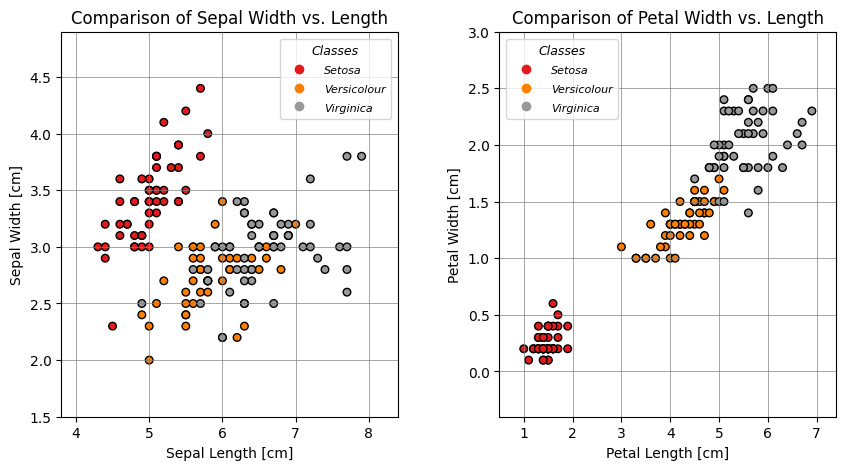

In [12]:
n_plots = 2
fig, axs = plt.subplots(1, n_plots, figsize = (10,5))
fig.subplots_adjust(wspace=0.3)
for i in range(n_plots):
    x_min, x_max = datas[:, i*2].min() - 0.5, datas[:, i*2].max() + 0.5
    y_min, y_max = datas[:, i*2 + 1].min() - 0.5, datas[:, i*2 + 1].max() + 0.5

    scatter = axs[i].scatter(datas[:, i*2], datas[:, i*2 + 1], c=labels, cmap=plt.cm.Set1, edgecolor="k", s=30)
    handles, _ = scatter.legend_elements()
    legend = axs[i].legend(handles, classes_name, title="Classes")
    legend.get_title().set_fontsize(9)
    legend.get_title().set_fontstyle('italic')
    for label in legend.get_texts():
        label.set_fontstyle('italic')
        label.set_fontsize(8)
    axs[i].grid(True, linewidth=0.5, color='gray')

    axs[i].set_title(f'Comparison of {characteristics_name[i]} Width vs. Length')
    
    axs[i].set_xlabel(features_name[i*2])
    axs[i].set_ylabel(features_name[i*2 + 1])

    axs[i].set_xlim(x_min, x_max)
    axs[i].set_ylim(y_min, y_max)
   
plt.show()

## Demonstration of the Decision Tree Classifier

### Test Cases for the Decision Tree Classifier

In [13]:
# Iris Dataset Test Cases (self created)
testcase = [[6.0, 2.5, 5.0, 1.8],
            [5.1, 3.5, 1.4, 0.2],
            [7.5, 3.0, 4.6, 1.3], 
            [4.7, 3.2, 1.3, 0.2], 
            [6.6, 3.3, 6.0, 2.5], 
            [5.8, 2.9, 4.5, 1.2]]

### The _scikit learn_ Decision Tree Classifier

To evaluate our self-implemented Decision Tree Classifier, we use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from [scikit learn](https://scikit-learn.org/stable/index.html) to obtain the classification predictions of the test cases, which will serve as the ground truth for our evaluation.

In [14]:
print(f"\nCurrent Dataset: {chosen_data:{len(max(list(dataset_dict.keys()), key=len))}s}" 
      f"  Current Criterion: sklearn default (gini)")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(datas, labels)
print(f"sklearn's default (gini) Prediction: {clf.predict(testcase)}")


Current Dataset: iris    Current Criterion: sklearn default (gini)
sklearn's default (gini) Prediction: [2 0 1 0 2 1]


Once we have the ground truth (shown in the cell above), we can then compare the predictions made by our self-implemented classifier with the ground truth, and evaluate the performance of our classifier based on accuracy.

### Self-Implemented Decision Tree Classifier

In this section, we obtain the self-implemented Decision Tree Classifier prediction of the test cases with all the supported node splitting algorithms.

#### Node Splitting Algorithms

To facilitate further applications, we have devised a list to store all supported node splitting criteria.

In [15]:
split_criteria = ["gini-impurity", "chi-square", "information-gain", "reduction-in-variance"]

#### Gini Impurity

In [16]:
m = split_criteria[0]

In [17]:
print(f"\nCurrent Dataset: {chosen_data:{len(max(list(dataset_dict.keys()), key=len))}s}" 
      f"  Current Criterion: {m:{len(max(split_criteria, key=len))}s}")

clf = DecisionTreeClassifier()
clf.fit(datas, labels, criterion=m)
clf.print_decision_tree(feature_names=[f"{chosen_data} {i}" for i in range(1,len(datas[0])+1)], 
                        class_names=[f"Class {i}" for i in range(1,len(set(labels))+1)], 
                        criterion=m,
                        file_name=f"{chosen_data}_{m}.txt",
                        show_details=True
                        )

print(f"{m}'s Prediction: {clf.predict(testcase)}")


Current Dataset: iris    Current Criterion: gini-impurity        
gini-impurity's Prediction: [2, 0, 1, 0, 2, 1]


##### **ASCII Visulization of the Gini Impurity Decision Tree**
Follow the listed steps to display the ASCII visualization of the decision tree in the terminal and allow for scrolling in case the tree is too large to fit in the terminal window:
1. Hit "Kernel"->"Restart & Run All".
2. Open the terminal window.
3. Navigate to the directory of the main Jupyter Notebook file.
4. Type `less -S dtrees/iris_gini-impurity.txt`.

#### Chi-Square

In [18]:
m = split_criteria[1]

In [19]:
print(f"\nCurrent Dataset: {chosen_data:{len(max(list(dataset_dict.keys()), key=len))}s}" 
      f"  Current Criterion: {m:{len(max(split_criteria, key=len))}s}")

clf = DecisionTreeClassifier()
clf.fit(datas, labels, criterion=m)
clf.print_decision_tree(feature_names=[f"{chosen_data} {i}" for i in range(1,len(datas[0])+1)], 
                        class_names=[f"Class {i}" for i in range(1,len(set(labels))+1)], 
                        criterion=m,
                        file_name=f"{chosen_data}_{m}.txt",
                        show_details=True
                        )

print(f"{m}'s Prediction: {clf.predict(testcase)}")


Current Dataset: iris    Current Criterion: chi-square           
chi-square's Prediction: [2, 0, 1, 0, 2, 1]


##### **ASCII Visulization of the Chi-Square Decision Tree**
Follow the listed steps to display the ASCII visualization of the decision tree in the terminal and allow for scrolling in case the tree is too large to fit in the terminal window:
1. Hit "Kernel"->"Restart & Run All".
2. Open the terminal window.
3. Navigate to the directory of the main Jupyter Notebook file.
4. Type `less -S dtrees/iris_chi-square.txt`.

#### Information Gain

In [20]:
m = split_criteria[2]

In [21]:
print(f"\nCurrent Dataset: {chosen_data:{len(max(list(dataset_dict.keys()), key=len))}s}" 
      f"  Current Criterion: {m:{len(max(split_criteria, key=len))}s}")

clf = DecisionTreeClassifier()
clf.fit(datas, labels, criterion=m)
clf.print_decision_tree(feature_names=[f"{chosen_data} {i}" for i in range(1,len(datas[0])+1)], 
                        class_names=[f"Class {i}" for i in range(1,len(set(labels))+1)], 
                        criterion=m,
                        file_name=f"{chosen_data}_{m}.txt",
                        show_details=True
                        )

print(f"{m}'s Prediction: {clf.predict(testcase)}")


Current Dataset: iris    Current Criterion: information-gain     
information-gain's Prediction: [2, 0, 1, 0, 2, 1]


##### **ASCII Visulization of the Information Gain Decision Tree**
Follow the listed steps to display the ASCII visualization of the decision tree in the terminal and allow for scrolling in case the tree is too large to fit in the terminal window:
1. Hit "Kernel"->"Restart & Run All".
2. Open the terminal window.
3. Navigate to the directory of the main Jupyter Notebook file.
4. Type `less -S dtrees/iris_information-gain.txt`.

#### Reduction in Variance

In [22]:
m = split_criteria[3]

In [23]:
print(f"\nCurrent Dataset: {chosen_data:{len(max(list(dataset_dict.keys()), key=len))}s}" 
      f"  Current Criterion: {m:{len(max(split_criteria, key=len))}s}")

clf = DecisionTreeClassifier()
clf.fit(datas, labels, criterion=m)
clf.print_decision_tree(feature_names=[f"{chosen_data} {i}" for i in range(1,len(datas[0])+1)], 
                        class_names=[f"Class {i}" for i in range(1,len(set(labels))+1)], 
                        criterion=m,
                        file_name=f"{chosen_data}_{m}.txt",
                        show_details=True
                        )

print(f"{m}'s Prediction: {clf.predict(testcase)}")


Current Dataset: iris    Current Criterion: reduction-in-variance
reduction-in-variance's Prediction: [2, 0, 1, 0, 2, 1]


##### **ASCII Visulization of the Reduction in Variance Decision Tree**
Follow the listed steps to display the ASCII visualization of the decision tree in the terminal and allow for scrolling in case the tree is too large to fit in the terminal window:
1. Hit "Kernel"->"Restart & Run All".
2. Open the terminal window.
3. Navigate to the directory of the main Jupyter Notebook file.
4. Type `less -S dtrees/iris_reduction-in-variance.txt`.

### Evaluation of Self-Implemented Decision Tree Classifier

Now that we have obtained the ground truth using the Decision Tree Classifier from [scikit learn](https://scikit-learn.org/stable/index.html) and our self-implemented Decision Tree Classifier, we can compare the predictions made by our classifier with the ground truth to evaluate its performance based on accuracy.

| Decision Tree Classifier    | Splitting Criteria    | Prediction         |
| :-------------------------- | :-------------------- | :----------------- |
| ground truth (scikit learn) | default (gini)        | [2, 0, 1, 0, 2, 1] |
| self-implemented            | gini-impurity         | [2, 0, 1, 0, 2, 1] |
| self-implemented            | chi-square            | [2, 0, 1, 0, 2, 1] |
| self-implemented            | information-gain      | [2, 0, 1, 0, 2, 1] |
| self-implemented            | reduction-in-variance | [2, 0, 1, 0, 2, 1] |

As can be seen from the table presented above, the predictions made by our self-implemented Decision Tree Classifier using all supported node splitting algorithms are identical to the ground truth obtained from scikit-learn. This indicates that our classifier is successful in accurately predicting the classification of the test cases.

In [24]:
# End of Project